In [330]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [331]:
def preprocessing(df):
    df.columns = ['uuid','flover_raw','time']
    df['time'] = pd.to_datetime(df['time'])
    df['flover'] = df['flover_raw'].apply(lambda x:int(x[x.find('r')+1:]))
    df['date'] = df['time'].apply(lambda x:pd.datetime.date(x))
    ndf = df[['flover','time','date']]
    ndf.index = df['time']
    return ndf

In [332]:
list_of_files_train = ['data_2015_1.txt','data_2015_2.txt','data_2015_3.txt','data_2015_4.txt','data_2015_5.txt']
list_of_files_validation = ['data_2015_12.txt','data_2016_1.txt']

lists_of_dataframe_train = [pd.read_table(''+list_of_files_train[i],header=None) for i in range(len(list_of_files_train))]
lists_of_dataframe_validation = [pd.read_table(''+list_of_files_validation[i],header=None) for i in range(len(list_of_files_validation))]

In [333]:
df_train = pd.concat(lists_of_dataframe_train,axis=0,ignore_index=True)
df_validation = pd.concat(lists_of_dataframe_validation,axis=0,ignore_index=True)
df_train = preprocessing(df_train)
df_validation = preprocessing(df_validation)

In [334]:
def transform(df):
    flavors_unique = np.sort(np.array(df['flover'].unique(),dtype=np.int))
    start_date = df['date'][0]
    end_date = df['date'][df.shape[0]-1]
    observation = pd.DataFrame(index=pd.date_range(start_date,end_date),columns=flavors_unique).fillna(0)
    for i in flavors_unique:
        observation[i] = df[df['flover']==i][['flover','date']].groupby('date').count()
    observation = observation.fillna(0)
    return observation

In [369]:
training_data = transform(df_train).resample('W',base=1).sum()
validation_data = transform(df_validation).resample('W',base=1).sum()
validation_data = validation_data[training_data.columns] # filter some flavors not show in the training data

In [402]:
from datetime import timedelta

In [403]:
A = []
for i in range(7):
    A.append(transform(df_train).resample('W',loffset=timedelta(days=i)).sum())

In [405]:
timedelta(days=1)

datetime.timedelta(1)

In [370]:
N = 2

In [371]:
X_train = np.hstack([training_data,training_data.shift(1)])[2:-1]
Y_train = np.array(training_data)[3:]
X_val = np.hstack([validation_data,validation_data.shift(1)])[2:-1]
Y_val = np.array(validation_data)[3:]

In [372]:
np.hstack([training_data,training_data.shift(1)])[2:-1].shape

(19, 40)

In [373]:
X_train.shape

(19, 40)

In [374]:
# X_train = X_train.tolist()
# Y_train = Y_train.tolist()

In [375]:
# X_val = X_val.tolist()
# Y_val = Y_val.tolist()

In [376]:
def loss(y,y_):
    y_[y_<0] = 0
    return np.mean(np.sum(np.power((y-y_),2),axis=1))

In [377]:
X_train.shape

(19, 40)

 原始方法

(6, 20)


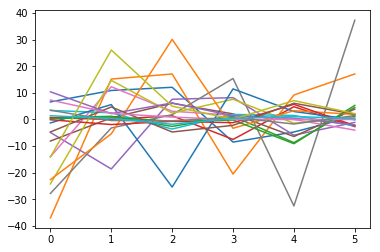

In [378]:
p1 = np.array(validation_data)[2:-1]
p2 = np.array(validation_data)[1:-2]
p3 = np.array(validation_data)[0:-3]
p = 0.7*p1 + 0.2*p2 + 0.1*p3
print(p.shape)
p[p<0]=0
plt.plot(p-Y_val)
plt.show()

In [345]:
np.array(X_train).shape

(19, 40)